<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/Medical_Assignment_bas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#lets take the data
import nltk
import os
import zipfile
ziploc="/content/drive/My Drive/datasets/medicalnotes-2019.zip"
zipref=zipfile.ZipFile(ziploc,'r')
zipref.extractall("/content/datas")
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#lets make the Training data
train_zip_ref=zipfile.ZipFile("/content/datas/data_split.zip",'r')
train_zip_ref.extractall("/content/datas/collection")

In [21]:
dirnames=os.listdir("/content/datas/collection/dataset/train-data")
dirnames

['Urology', 'Gastroenterology', 'Orthopedic', 'Radiology', 'Neurology']

In [22]:
#lets add labels for the data
import pandas as pd
import io
data_label=pd.DataFrame(columns={'target','zcontent'})
import codecs
con=0
for i in dirnames:
  filenames=os.listdir("/content/datas/collection/dataset/train-data/"+i)
  for j in filenames:
    f=io.open("/content/datas/collection/dataset/train-data/"+i+"/"+j,'r',encoding='cp1252')
    content=f.read()
    
    data_label=data_label.append({'target':con,'zcontent':content},ignore_index=True)
  con+=1

In [23]:
#Haha We created our train labels
data_label

,target,zcontent
0,0,\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS: </B> Righ...
1,0,\n\n\n\n\n<B>CHIEF COMPLAINT:</B> The patient...
2,0,\n\n\n\n\n<B>EXAM: </B> Ultrasound examination...
3,0,\n\n\n\n\n<B>HISTORY OF PRESENT ILLNESS:</B> ...
4,0,\n\n\n\n\n<B>PREOPERATIVE DIAGNOSES:</B>\n1. ...
...,...,...
821,4,\n\n\n\n\n<B>CHIEF COMPLAINT: </B> Followup of...
822,4,\n\n\n\n\n<B>EXAM:</B> CT cervical spine (C-s...
823,4,\n\n\n\n\n<B>REASON FOR VISIT:</B> Followup s...
824,4,\n\n\n\n\n<B>DIAGNOSIS:</B> Status post brain...


In [24]:
def preprocesso(need):  
  #lets import and preprocess our train data
  import nltk
  #nltk.download('stopwords')
  stop_words = set(stopwords.words('english'))  
  from nltk.tokenize import word_tokenize
  import string
  import re
  s=re.sub("<B>.*</B>","",need)
  s=re.sub("\n"," ",s)
  mains="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz "
  news=""
  for i in s:
    if i in mains:
      news=news+i
  news=re.sub(" +"," ",news)
  newstr=""
  for i in news.split():
    if i not in stop_words and len(i)>2:
      newstr=newstr+" "+i
  tok=' '.join([stemmer.lemmatize(word) for word in newstr.split()])
  return tok


In [25]:
data_label.zcontent=data_label.zcontent.apply(preprocesso)

In [26]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
vocabmaker=data_label['zcontent']


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
med_countvectorizer = CountVectorizer(dtype = 'uint8').fit_transform(vocabmaker).toarray()

In [39]:
print(len(med_countvectorizer))

826


In [40]:
#Splitting into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(med_countvectorizer,data_label['target'] , test_size=0.1)

In [42]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.87      0.87      0.87        15
           2       0.73      0.94      0.82        17
           3       0.53      0.50      0.51        20
           4       0.59      0.53      0.56        19

    accuracy                           0.69        83
   macro avg       0.70      0.70      0.70        83
weighted avg       0.68      0.69      0.68        83



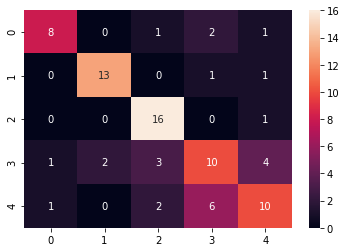

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

